In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
# Download the data from yfinance
etfs = ['SPY', 'QQQ']
data = yf.download(etfs, start='2015-01-01', end='2025-07-21')['Close']
data = data.dropna()
data.head()

C:\Users\pdeny\AppData\Local\Temp\ipykernel_12852\3513979687.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(etfs, start='2015-01-01', end='2025-07-21')['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,QQQ,SPY
Date,,
2015-01-02,95.016579,171.568024
2015-01-05,93.622795,168.469574
2015-01-06,92.367493,166.882782
2015-01-07,93.558174,168.962326
2015-01-08,95.348877,171.960556


In [4]:
# Transform the data
data = data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Price')


# Change the date into Datetime
data['Date'] = pd.to_datetime(data['Date'])  
data = data.sort_values(by=['Ticker', 'Date'])

data

,Date,Ticker,Price
0,2015-01-02,QQQ,95.016579
1,2015-01-05,QQQ,93.622795
2,2015-01-06,QQQ,92.367493
3,2015-01-07,QQQ,93.558174
4,2015-01-08,QQQ,95.348877
...,...,...,...
5297,2025-07-14,SPY,624.809998
5298,2025-07-15,SPY,622.140015
5299,2025-07-16,SPY,624.219971
5300,2025-07-17,SPY,628.039978


In [5]:
# Show the columns list
data.columns

Index(['Date', 'Ticker', 'Price'], dtype='object')

In [6]:
# Check the datatype
data.dtypes

Date      datetime64[ns]
Ticker            object
Price            float64
dtype: object

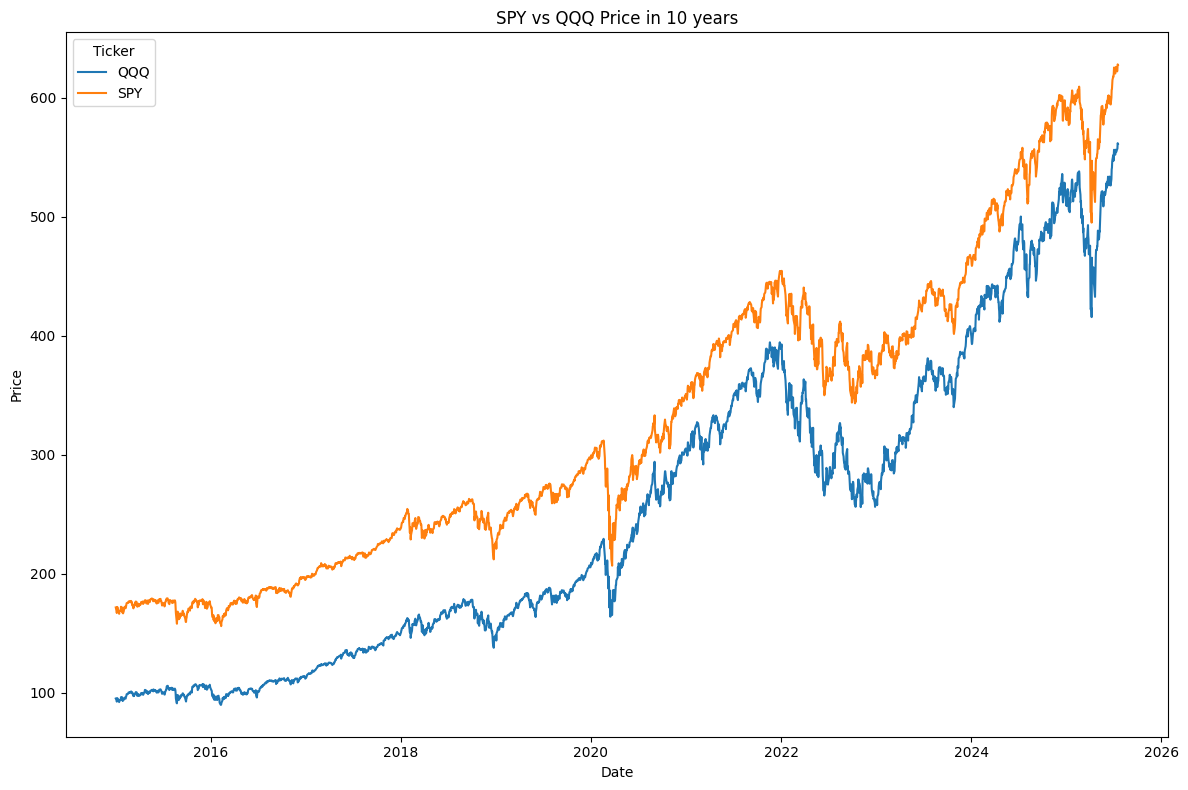

In [7]:
# Basic line chart
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Price', hue='Ticker', data=data)
plt.title('SPY vs QQQ Price in 10 years')
plt.tight_layout()
plt.savefig('../output/visualizations/spy_vs_qqq.png')
plt.show()

In [8]:
# Calculate the return percentage
data['Return'] = data.groupby('Ticker')['Price'].pct_change()
data['Cumulative Return'] = (1 + data['Return']).groupby(data['Ticker']).cumprod()

data

,Date,Ticker,Price,Return,Cumulative Return
0,2015-01-02,QQQ,95.016579,NaN,NaN
1,2015-01-05,QQQ,93.622795,-0.014669,0.985331
2,2015-01-06,QQQ,92.367493,-0.013408,0.972120
3,2015-01-07,QQQ,93.558174,0.012891,0.984651
4,2015-01-08,QQQ,95.348877,0.019140,1.003497
...,...,...,...,...,...
5297,2025-07-14,SPY,624.809998,0.001908,3.641763
5298,2025-07-15,SPY,622.140015,-0.004273,3.626200
5299,2025-07-16,SPY,624.219971,0.003343,3.638323
5300,2025-07-17,SPY,628.039978,0.006120,3.660589


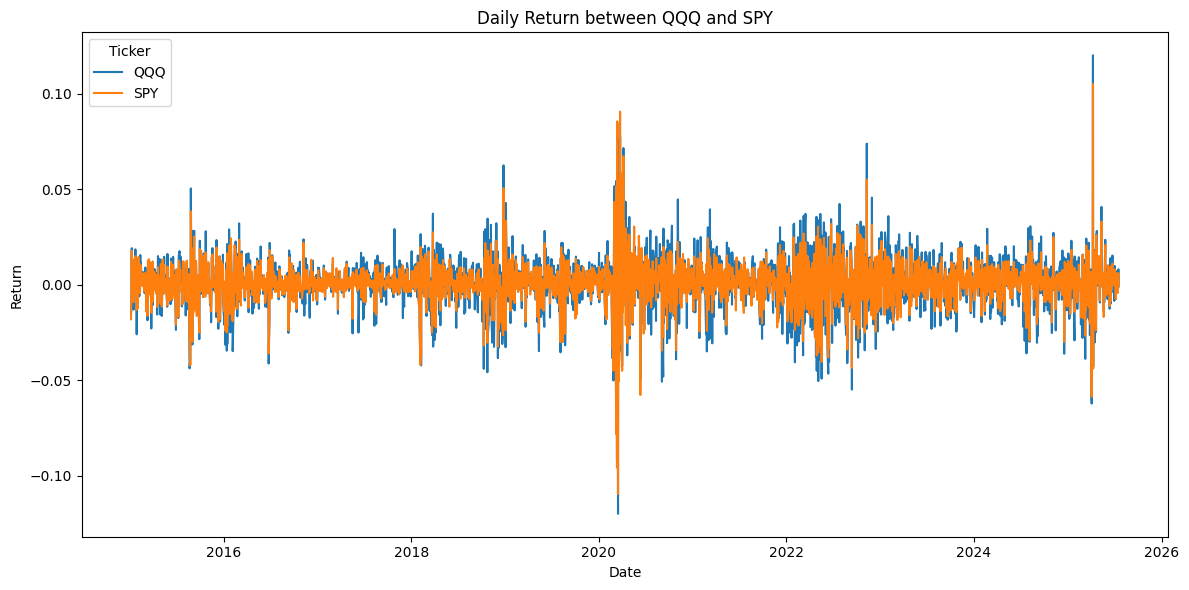

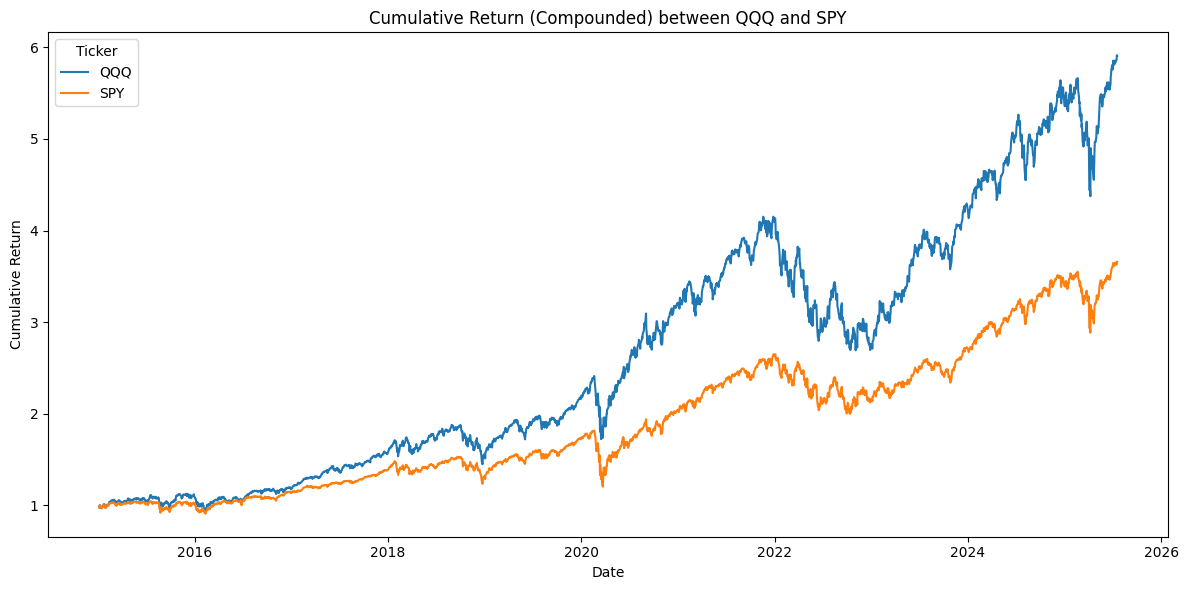

In [19]:
# Visualize the return between SPY and QQQ

plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='Return', hue='Ticker')
plt.title('Daily Return between QQQ and SPY')
plt.tight_layout()
plt.savefig('../output/visualizations/daily_returns_qqq_spy.png')
plt.show()

# Visualize the cumulative return between SPY and QQQ

plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='Cumulative Return', hue='Ticker')
plt.title('Cumulative Return (Compounded) between QQQ and SPY')
plt.tight_layout()
plt.savefig('../output/visualizations/cumulative_return.png')
plt.show()

In [10]:
# Return Correlation between QQQ and SPY
return_df = data.pivot(index='Date', columns='Ticker', values='Return')

returns = return_df[['QQQ', 'SPY']].copy()
returns.columns = ['QQQ', 'SPY']

returns_correlation = returns['QQQ'].corr(returns['SPY'])
print("Return correlation between QQQ and SPY is:", returns_correlation)

Return correlation between QQQ and SPY is: 0.9335909013072449


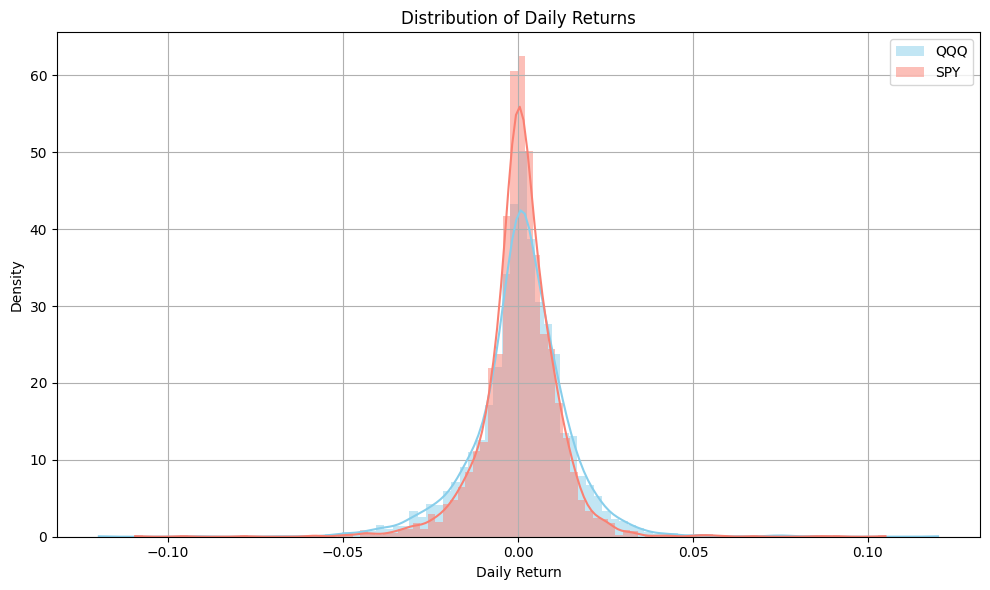

In [20]:
# Check Return Distribution
plt.figure(figsize=(10,6))

sns.histplot(return_df['QQQ'], bins=100, kde=True, color='skyblue', label='QQQ', stat='density', linewidth=0)
sns.histplot(return_df['SPY'], bins=100, kde=True, color='salmon', label='SPY', stat='density', linewidth=0)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../output/visualizations/daily_returns_distribution.png')
plt.show()

In [12]:
# Describe Statistic
return_df.describe()

Ticker,QQQ,SPY
count,2650.000000,2650.000000
mean,0.000769,0.000554
std,0.014002,0.011355
min,-0.119788,-0.109424
25%,-0.005095,-0.003711
50%,0.001198,0.000612
75%,0.007871,0.005962
max,0.120031,0.105019


In [13]:
# Calculate skewness 
return_df.skew()

Ticker
QQQ   -0.185983
SPY   -0.304821
dtype: float64

In [14]:
# Calculate kurtosis
return_df.kurt()

Ticker
QQQ     7.577969
SPY    13.970414
dtype: float64

In [15]:
# Daily Volatility for each ticker
volatility = data.groupby('Ticker')['Return'].std()

# Annualized volatility (assuming 252 trading days)
annualized_volatility = volatility * (252 ** 0.5)

print("Daily Volatility:")
print(volatility)
print("\nAnnualized Volatility:")
print(annualized_volatility)

Daily Volatility:
Ticker
QQQ    0.014002
SPY    0.011355
Name: Return, dtype: float64

Annualized Volatility:
Ticker
QQQ    0.222275
SPY    0.180261
Name: Return, dtype: float64


In [16]:
data = data.sort_values(['Ticker', 'Date'])

# Calculate running max
data['Running Max'] = data.groupby('Ticker')["Cumulative Return"].transform(lambda x: x.cummax())

# Calculate drawdown
data['Drawdown'] = data['Cumulative Return'] / data['Running Max'] - 1

# Get max drawdown for each ticker
max_drawdown = data.groupby("Ticker")["Drawdown"].min()

print("Max Drawdown:")
print(max_drawdown)

Max Drawdown:
Ticker
QQQ   -0.351187
SPY   -0.337173
Name: Drawdown, dtype: float64


In [17]:
# Save both file to CSV
data.to_csv('../data/full_data.csv', index=False)
return_df.to_csv('../data/daily_return_data.csv', index=False)